## Workflow - Pass Completion Rate (Player)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
```

In [1]:
import pandas as pd

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns and rows of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

In [19]:
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = False
pd.options.display.max_rows = None

---
> ### 2. LOAD & PREP DATA

**2.0 Data Load** - read in the `match_events.csv` file located in the `data` directory (folder)
```
raw_data = pd.read_csv("data/match_events.csv")
```

In [3]:
raw_data = pd.read_csv("data/match_events.csv")

**2.1 Data Prep** - make copy of raw data to edit.

```
df = raw_data.copy()
```

In [4]:
df = raw_data.copy()

**2.2 Data Prep** - check the top of the `df` object, which is a `pandas` dataframe (df), basically a 2 dimensional data structure with rows & columns 
```
df.head()
```

In [5]:
df.head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,man_u,NaN,NaN,set_piece,NaN,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN


**2.3 Data Prep** - check the dimensions of the df (<no. of rows>, <no. of columns>). Should be (1854, 18).
```
df.shape
```

In [6]:
df.shape

(1854, 18)

---
> ### 3. EXPLORATORY DATA ANALYSIS (EDA)

**3.0 EDA** - select just the `player1` column of `df` and chain the `value_counts()` function onto this to make a frequency table 
```
df["player1"].value_counts()
```

In [7]:
df["player1"].value_counts()

elneny        126
cedric        116
telles        108
white         108
xhaka         108
odegaard      100
gabriel        97
varane         93
dalot          90
lindelof       89
ramsdale       84
tavares        81
             ... 
matic          61
ronaldo        56
nketiah        54
smith_rowe     41
de_gea         39
elanga         37
mata           20
rashford       14
lingard        12
martinelli     11
holding         8
tomiyasu        8
Name: player1, Length: 28, dtype: int64

**3.1 EDA** - extend the code above to include the `event` column as well
```
df[["player1", "event"]].value_counts()
```

In [8]:
df[["player1", "event"]].value_counts()

player1    event                       
elneny     completed_pass                  64
xhaka      completed_pass                  63
cedric     completed_pass                  55
white      completed_pass                  55
odegaard   completed_pass                  49
lindelof   completed_pass                  48
dalot      completed_pass                  43
telles     completed_pass                  42
varane     completed_pass                  41
gabriel    completed_pass                  40
matic      completed_pass                  29
saka       completed_pass                  26
                                           ..
mctominay  shot_attempt                     1
nketiah    created_looseball                1
           force_opponent_clearance_out     1
           interception                     1
           miscontrolled                    1
           opponent_forced_clear_out        1
odegaard   challenge_no_turnover            1
           cleared_out                  

**3.2 EDA** - create an object `pass_filter` that can be used to filter for both the `"completed_pass"` and `"incomplete_pass"` events in the `df`
```
pass_filter = (df["event"] == "completed_pass") | (df["event"] == "incomplete_pass")
```

In [9]:
pass_filter = (df["event"] == "completed_pass") | (df["event"] == "incomplete_pass")

**3.3 EDA** - use the `pass_filter` to filter the `df` for the `"completed_pass"` and `"incomplete_pass"` events
```
df[pass_filter]
```

In [10]:
df[pass_filter]

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN
8,0,8,0.0,10.0,1,elneny,arsenal,cedric,arsenal,completed_pass,fernandes,man_u,37.6,40.0,28.8,18.3,37.4,42.6
9,0,10,0.0,14.0,1,cedric,arsenal,NaN,NaN,incomplete_pass,sancho,man_u,28.8,18.3,NaN,NaN,31.5,13.0
17,0,28,0.0,30.0,1,cedric,arsenal,white,arsenal,completed_pass,NaN,NaN,57.6,7.6,56.1,10.2,NaN,NaN
18,0,30,0.0,32.0,1,white,arsenal,gabriel,arsenal,completed_pass,NaN,NaN,56.1,10.2,47.6,35.7,NaN,NaN
20,0,33,0.0,35.0,1,gabriel,arsenal,tavares,arsenal,completed_pass,NaN,NaN,48.7,37.7,67.9,66.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


**3.4 EDA** - chain a `groupby()` function to this filtered df, specifying `player1` and `event` as the columns for grouping the data, chaining a `size()` function after 
```
df[pass_filter].groupby( ["player1", "event"]).size()
```

In [11]:
df[pass_filter].groupby( ["player1", "event"]).size()

player1     event          
cedric      completed_pass     55
            incomplete_pass    10
dalot       completed_pass     43
            incomplete_pass     6
de_gea      completed_pass     17
            incomplete_pass     1
elanga      completed_pass     12
elneny      completed_pass     64
            incomplete_pass     3
fernandes   completed_pass     26
            incomplete_pass     6
gabriel     completed_pass     40
                               ..
smith_rowe  incomplete_pass     2
tavares     completed_pass     24
            incomplete_pass     5
telles      completed_pass     42
            incomplete_pass    14
tomiyasu    completed_pass      3
varane      completed_pass     41
            incomplete_pass     5
white       completed_pass     55
            incomplete_pass     6
xhaka       completed_pass     63
            incomplete_pass     4
Length: 52, dtype: int64

**3.5 EDA** - further chain an `unstack()` function to this code
```
df[pass_filter].groupby( ["player1", "event"]).size().unstack()
```

In [12]:
df[pass_filter].groupby( ["player1", "event"]).size().unstack()

event,completed_pass,incomplete_pass
player1,,
cedric,55.0,10.0
dalot,43.0,6.0
de_gea,17.0,1.0
elanga,12.0,NaN
elneny,64.0,3.0
fernandes,26.0,6.0
gabriel,40.0,6.0
holding,2.0,NaN
lindelof,48.0,3.0


**3.6 EDA** - further chain a `sort_values()` function to this code, specifying the column to sort by as `completed_pass`, and to sort in descending order, i.e. `ascending = False`
```
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False)
```

In [20]:
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False)

event,completed_pass,incomplete_pass
player1,,
elneny,64.0,3.0
xhaka,63.0,4.0
white,55.0,6.0
cedric,55.0,10.0
odegaard,49.0,4.0
lindelof,48.0,3.0
dalot,43.0,6.0
telles,42.0,14.0
varane,41.0,5.0


---
> ### 4. DATA ANALYSIS & VISUALISATION

**4.0 ANALYSIS/VIZ** - chain a `plot()` function onto the code, specifying the kind as a `"bar"`, and for the bar to be stacked
```
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False).plot(kind="bar", stacked=True)
```

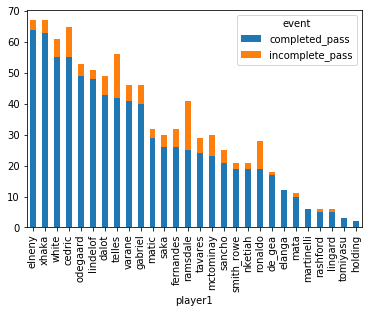

In [14]:
df[pass_filter].groupby(["player1", "event"]).size().unstack().sort_values("completed_pass", ascending=False).plot(kind="bar", stacked=True)

**4.1 ANALYSIS** - use the code but cut the `sort_values()` and `plot()` functions, instead chaining an `assign()` function that will create a new column called `rate` which will calculate each player's completed pass rate
```
df[ pass_filter ].groupby( ["player1", "event"]).size().unstack().assign(rate = lambda x: x["completed_pass"] / (x["completed_pass"] + x["incomplete_pass"]) * 100).sort_values("rate", ascending=False)
```

In [15]:
df[ pass_filter ].groupby( ["player1", "event"]).size().unstack().assign(rate = lambda x: x["completed_pass"] / (x["completed_pass"] + x["incomplete_pass"]) * 100).sort_values("rate", ascending=False)

event,completed_pass,incomplete_pass,rate
player1,,,
elneny,64.0,3.0,95.522388
de_gea,17.0,1.0,94.444444
lindelof,48.0,3.0,94.117647
xhaka,63.0,4.0,94.029851
odegaard,49.0,4.0,92.452830
mata,10.0,1.0,90.909091
matic,29.0,3.0,90.625000
nketiah,19.0,2.0,90.476190
smith_rowe,19.0,2.0,90.476190


---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_